dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


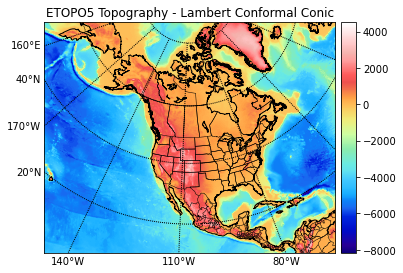

In [1]:
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

etopodata = Dataset('etopo5.cdf')
print(etopodata.variables.keys())
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]

topoin,lons = shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=10000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

parallels = np.arange(0,80,20)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10,360,30)
m.drawmeridians(meridians,labels=[1,0,0,1])

cb = m.colorbar(im,'right',size='5%',pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Lights at Night image warped from 'cyl' to 'ortho' projection")

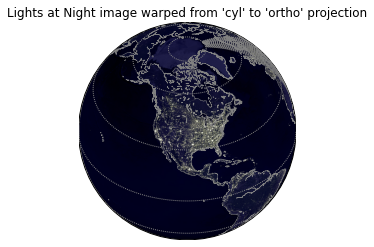

In [2]:
fig=plt.figure()
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
m.warpimage(image='earth_lights_lrg.jpg')
m.drawcoastlines(linewidth=0.5,color='0.5')
m.drawmeridians(np.arange(0.360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)

plot native cylindrical map (no warping needed) ...


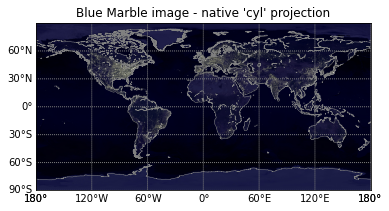

In [3]:
fig = plt.figure()
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')

m.drawcoastlines(linewidth=0.5,color='0.5')

m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()